## Análise de recorrência de câncer de próstata. 





### Introdução
  Neste projeto, explorei e analisei o conjunto de dados "Blood Storage" do Cleveland Clinic Lerner Research Institute (http://www.lerner.ccf.org/qhs/datasets/).

    O conjunto de dados foi originalmente usado para analisar como o armazenamento de sangue pode influenciar na recorrência do câncer de próstata. Neste trabalho, entretanto, o objetivo é entender se outras colunas influenciam nessa recorrência.

    Como um estatístico, ao me deparar com vários estudos e conjuntos de dados relacionados a este assunto, identifiquei que seria possível prever aproximadamente como poderia trabalhar com estes dados, realizando alguns insights importantes. 

### Drescrição do Dataset

![image.png](attachment:image.png)


### Exploração Inicial



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set pastel color for plots
sns.set(style="ticks", palette="pastel")

# import dataset and view first datas
df = pd.read_csv("https://raw.githubusercontent.com/elayni/prostate-cancer-recurrence-analysis/main/Dataset/BloodStorage.csv", error_bad_lines=False)

df.head()

,RBC Age Group,Median RBC Age,Age,AA,FamHx,PVol,TVol,T Stage,bGS,BN+,OrganConfined,PreopPSA,PreopTherapy,Units,sGS,AnyAdjTherapy,AdjRadTherapy,Recurrence,Censor,TimeToRecurrence
0,3,25,72.1,0,0,54.0,3.0,1.0,3.0,0,0,14.08,1,6,1,0,0,1,0,2.67
1,3,25,73.6,0,0,43.2,3.0,2.0,2.0,0,1,10.50,0,2,3,0,0,1,0,47.63
2,3,25,67.5,0,0,102.7,1.0,1.0,3.0,0,1,6.98,1,1,1,0,0,0,1,14.10
3,2,15,65.8,0,0,46.0,1.0,1.0,1.0,0,1,4.40,0,2,3,0,0,0,1,59.47
4,2,15,63.2,0,0,60.0,2.0,1.0,2.0,0,1,21.40,0,3,3,0,0,0,1,1.23


In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
311    False
312    False
313    False
314    False
315    False
Length: 316, dtype: bool

In [ ]:
# info() makes it possible to see missing data, data types, column names, and number of entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RBC Age Group     316 non-null    int64  
 1   Median RBC Age    316 non-null    int64  
 2   Age               316 non-null    float64
 3   AA                316 non-null    int64  
 4   FamHx             316 non-null    int64  
 5   PVol              307 non-null    float64
 6   TVol              310 non-null    float64
 7   T Stage           303 non-null    float64
 8   bGS               314 non-null    float64
 9   BN+               316 non-null    int64  
 10  OrganConfined     316 non-null    int64  
 11  PreopPSA          313 non-null    float64
 12  PreopTherapy      316 non-null    int64  
 13  Units             316 non-null    int64  
 14  sGS               316 non-null    int64  
 15  AnyAdjTherapy     316 non-null    int64  
 16  AdjRadTherapy     316 non-null    int64  
 1

In [ ]:
# count missing data
df.isna().sum()

RBC Age Group        0
Median RBC Age       0
Age                  0
AA                   0
FamHx                0
PVol                 9
TVol                 6
T Stage             13
bGS                  2
BN+                  0
OrganConfined        0
PreopPSA             3
PreopTherapy         0
Units                0
sGS                  0
AnyAdjTherapy        0
AdjRadTherapy        0
Recurrence           0
Censor               0
TimeToRecurrence     1
dtype: int64

In [ ]:
# drop categorical data
df_nocatg = df[["Age", "PVol", "PreopPSA", "Units", "TimeToRecurrence"]]

  Não existe um "melhor" número de bins, e diferentes tamanhos de bins podem revelar diferentes características dos dados. Para determinar o número de bins para que possamos ter uma melhor visualização do histograma, usamos a fórmula de Sturges. Esta fórmula é derivada de uma distribuição binomial e assume implicitamente uma distribuição aproximadamente normal. Portanto, pode ser usado como um critério para determinar o número de classes ou intervalos necessários para representar graficamente um conjunto de dados estatísticos. Entre outras do gênero, a fórmula de Sturges foi escolhida para este projeto devido à sua facilidade de aplicação.

In [ ]:
# Sturges for bins number
k = 1 + 3.322 * np.log10(316)

<ipython-input-107-4f4cf55cf852>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_nocatg.hist(ax=fig, bins= int(k), grid=True)


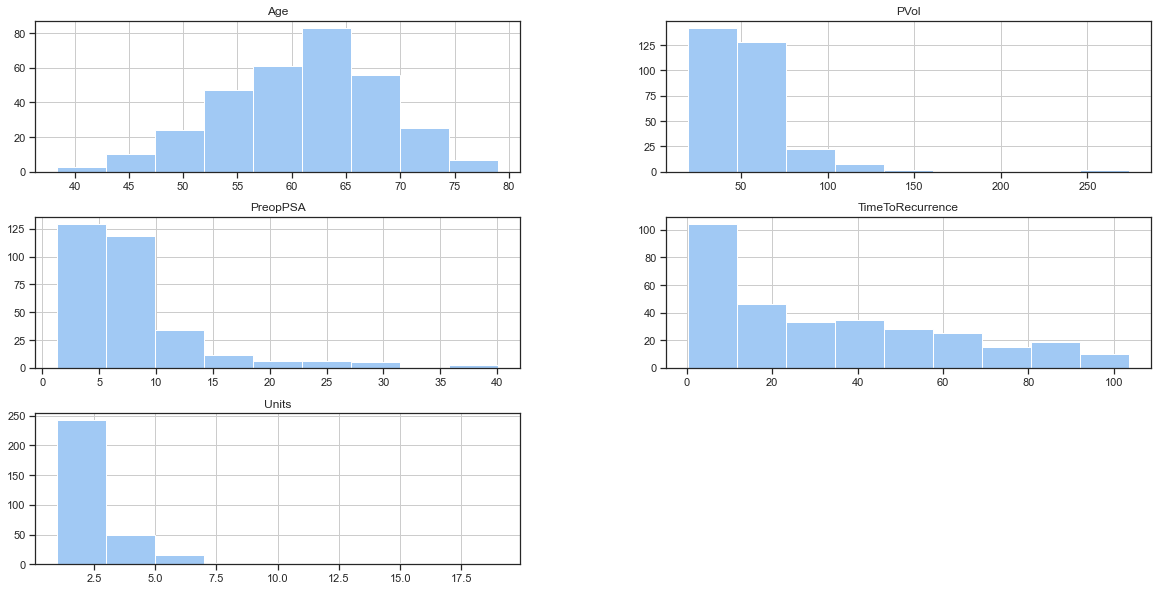

In [ ]:
# To see data distribution
fix, fig = plt.subplots(figsize=(20,10))
df_nocatg.hist(ax=fig, bins= int(k), grid=True)
plt.show()

In [ ]:
# Percent of race, 17% is African American and 82% can be white, asian or indigenous people,
# but because they are American people, most of them are likely to be white.
race = df['AA'].value_counts()
race/len(df)

0    0.825949
1    0.174051
Name: AA, dtype: float64

### Pré-Processamento do Dataset

In [ ]:
df.head()

,RBC Age Group,Median RBC Age,Age,AA,FamHx,PVol,TVol,T Stage,bGS,BN+,OrganConfined,PreopPSA,PreopTherapy,Units,sGS,AnyAdjTherapy,AdjRadTherapy,Recurrence,Censor,TimeToRecurrence
0,3,25,72.1,0,0,54.0,3.0,1.0,3.0,0,0,14.08,1,6,1,0,0,1,0,2.67
1,3,25,73.6,0,0,43.2,3.0,2.0,2.0,0,1,10.50,0,2,3,0,0,1,0,47.63
2,3,25,67.5,0,0,102.7,1.0,1.0,3.0,0,1,6.98,1,1,1,0,0,0,1,14.10
3,2,15,65.8,0,0,46.0,1.0,1.0,1.0,0,1,4.40,0,2,3,0,0,0,1,59.47
4,2,15,63.2,0,0,60.0,2.0,1.0,2.0,0,1,21.40,0,3,3,0,0,0,1,1.23


In [ ]:
# replacing missing data to column median
df['PVol'].fillna(df['PVol'].median(), inplace=True)
df['PreopPSA'].fillna(df['PreopPSA'].median(), inplace=True)
df['TimeToRecurrence'].fillna(df['TimeToRecurrence'].median(), inplace=True)
# only categorical missing data 
df.isna().sum()

RBC Age Group        0
Median RBC Age       0
Age                  0
AA                   0
FamHx                0
PVol                 0
TVol                 6
T Stage             13
bGS                  2
BN+                  0
OrganConfined        0
PreopPSA             0
PreopTherapy         0
Units                0
sGS                  0
AnyAdjTherapy        0
AdjRadTherapy        0
Recurrence           0
Censor               0
TimeToRecurrence     0
dtype: int64

In [ ]:
# drop categorical missing data
df = df.dropna()

In [ ]:
# drop columns that will not be useful to answer questions
df = df.drop(["RBC Age Group", "Median RBC Age"], axis = 1)

In [ ]:
# checck dataframe
df.head(3)

,Age,AA,FamHx,PVol,TVol,T Stage,bGS,BN+,OrganConfined,PreopPSA,PreopTherapy,Units,sGS,AnyAdjTherapy,AdjRadTherapy,Recurrence,Censor,TimeToRecurrence
0,72.1,0,0,54.0,3.0,1.0,3.0,0,0,14.08,1,6,1,0,0,1,0,2.67
1,73.6,0,0,43.2,3.0,2.0,2.0,0,1,10.50,0,2,3,0,0,1,0,47.63
2,67.5,0,0,102.7,1.0,1.0,3.0,0,1,6.98,1,1,1,0,0,0,1,14.10


#### Medidas de centralidade e dispersão
     Não usamos df.mean () porque algumas colunas são normalizadas para dados categóricos.

In [ ]:
df_numeric = df[["Age", "PVol", "PreopPSA", "Units", "TimeToRecurrence"]]

# centrality and dispersion measures
# means and medians
df_means = pd.DataFrame(np.mean(df_numeric, axis = 0), columns= ["means"])
df_medians = pd.Series(np.median(df_numeric, axis=0), name = "medians")

df_means.reset_index(drop=True, inplace = True)
df_c = pd.concat([df_means, df_medians], axis=1)

df_c.rename(index = {0: "Age", 1: "Pvol", 2: "PreopPSA",
               3:"Units", 4:"TimeToReccurence"}, inplace= True)

# dataframe with centrality measures - mean and median
df_c

,means,medians
Age,61.063636,61.90
Pvol,55.759259,49.00
PreopPSA,8.251111,6.20
Units,2.383838,2.00
TimeToReccurence,33.567778,26.77


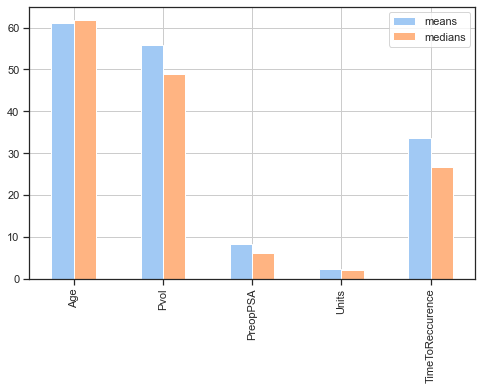

In [ ]:
# comparison between means and medians
df_c.plot(kind = 'bar', grid=True, figsize=(8,5))

In [ ]:
# mode for categorical data
df_catg = df[["AA", "FamHx", "TVol", "T Stage", "bGS", "BN+", "OrganConfined",
             "PreopTherapy", "sGS", "AnyAdjTherapy", "AdjRadTherapy", "Recurrence", "Censor"]]

df_catg.mode()

,AA,FamHx,TVol,T Stage,bGS,BN+,OrganConfined,PreopTherapy,sGS,AnyAdjTherapy,AdjRadTherapy,Recurrence,Censor
0,0,0,2.0,1.0,1.0,0,1,0,3,0,0,0,1


In [ ]:
# variance
np.var(df_numeric)

Age                  53.250328
PVol                846.115950
PreopPSA             37.343326
Units                 3.145597
TimeToRecurrence    824.442434
dtype: float64

In [ ]:
# standard deviation
df_numeric.std()

Age                  7.309598
PVol                29.137166
PreopPSA             6.121232
Units                1.776577
TimeToRecurrence    28.761567
dtype: float64

In [ ]:
df.shape

(297, 18)

#### Visualização do Dados.

Text(0.5, 1.0, 'Any Adjuvant Therapy and Time to Recurrence')

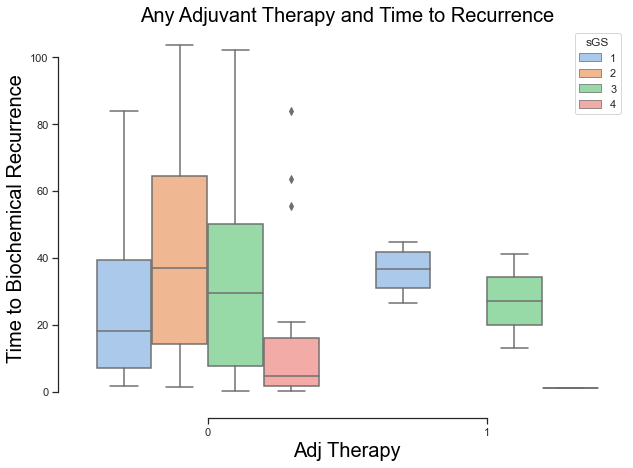

In [ ]:
# Draw a boxplot
plt.figure(figsize=(10,7))
sns.boxplot(x="AnyAdjTherapy", y="TimeToRecurrence",
            hue="sGS", data=df)
sns.despine(offset=10, trim=True)
plt.xlabel('Adj Therapy', c ='black', fontsize=20)
plt.ylabel('Time to Biochemical Recurrence',c='g', color = 'black', fontsize=20)
plt.title('Any Adjuvant Therapy and Time to Recurrence', c='black', fontsize=20)

# some outliers in pacientes with 4 surgical Gleason score without adjuvant therapy

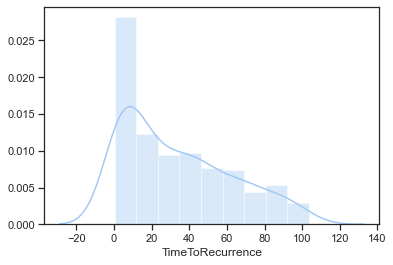

In [ ]:
# Sturges for bins number
k = 1 + 3.322 * np.log10(297)


sns.distplot(df["TimeToRecurrence"], bins = int(k))

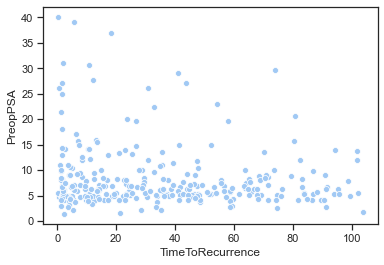

In [ ]:
# dispersion
sns.scatterplot(data = df, x = "TimeToRecurrence", y = "PreopPSA")

In [ ]:
# Correlation
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,AA,FamHx,PVol,TVol,T Stage,bGS,BN+,OrganConfined,PreopPSA,PreopTherapy,Units,sGS,AnyAdjTherapy,AdjRadTherapy,Recurrence,Censor,TimeToRecurrence
Age,1.000000,-0.024264,-0.102818,0.287307,-0.090404,0.003531,0.044850,-0.153700,-0.068833,-0.038046,-0.065045,0.016089,0.083405,-0.046674,-0.030774,0.017008,-0.017008,0.064720
AA,-0.024264,1.000000,-0.081702,-0.030033,0.045794,-0.074346,-0.023116,0.124778,0.025109,0.108834,-0.002867,-0.024592,0.022225,-0.009262,-0.025836,0.071264,-0.071264,-0.082977
FamHx,-0.102818,-0.081702,1.000000,0.019386,-0.025693,0.014295,-0.025577,-0.025259,0.016690,-0.069737,-0.101042,0.000232,0.089850,0.025123,-0.030766,-0.103641,0.103641,-0.069398
PVol,0.287307,-0.030033,0.019386,1.000000,-0.183566,-0.084859,0.015832,-0.070312,0.055137,0.238676,-0.136941,0.069470,-0.009232,-0.070820,-0.017703,-0.001467,0.001467,0.077551
TVol,-0.090404,0.045794,-0.025693,-0.183566,1.000000,0.303626,0.299160,0.228656,-0.483314,0.294431,0.128673,-0.123089,0.210579,0.196076,0.073355,0.303387,-0.303387,-0.107887
T Stage,0.003531,-0.074346,0.014295,-0.084859,0.303626,1.000000,0.436488,0.321117,-0.375601,0.268857,0.280653,-0.077814,-0.059189,0.222976,-0.020899,0.239060,-0.239060,-0.152740
bGS,0.044850,-0.023116,-0.025577,0.015832,0.299160,0.436488,1.000000,0.171574,-0.370313,0.288790,0.337446,-0.027507,0.041555,0.238396,0.125723,0.349428,-0.349428,-0.255963
BN+,-0.153700,0.124778,-0.025259,-0.070312,0.228656,0.321117,0.171574,1.000000,-0.151286,0.258109,0.302058,-0.069671,-0.176945,0.343895,-0.014322,0.124778,-0.124778,-0.064761
OrganConfined,-0.068833,0.025109,0.016690,0.055137,-0.483314,-0.375601,-0.370313,-0.151286,1.000000,-0.212079,-0.168890,0.032972,-0.122811,-0.210090,-0.078598,-0.240545,0.240545,0.101030
PreopPSA,-0.038046,0.108834,-0.069737,0.238676,0.294431,0.268857,0.288790,0.258109,-0.212079,1.000000,0.229456,0.019184,-0.085203,0.155966,0.035657,0.248745,-0.248745,-0.097288


### O tamanho do tumor influencia o tempo de recorrência?
A pergunta original "O tamanho do tumor influencia na recorrência?" não pode ser respondida. Conseguimos ver inconsistência nos dados entre as colunas Recurrence e TimeToRecurrence.

In [ ]:
# Correlation
df['TimeToRecurrence'].corr(df['TVol'])

# indicates a insignificant correlation.

-0.1078873618484599

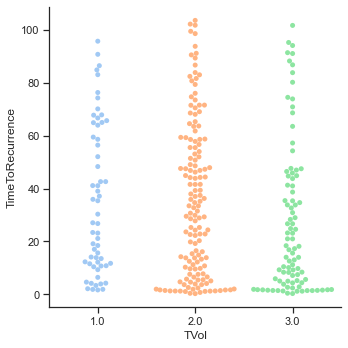

In [ ]:
# the distribuition of TVol categories show us higher agglomeration in TVol = 2, indicating that data cleaning is necessary
sns.catplot(x="TVol", y="TimeToRecurrence", kind="swarm", data= df)

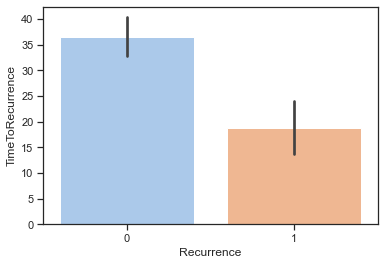

In [ ]:
# inconsistency
sns.barplot(data=df, x="Recurrence", y="TimeToRecurrence")

In [ ]:
# if count the positive censoring indicator, we will have the same number of non-recurrences
# maybe, all non-recurrences cases are recurrence cases
rec = df['Recurrence'].value_counts()
censor = df['Censor'].value_counts()

print(rec)
print(censor)

0    248
1     49
Name: Recurrence, dtype: int64
1    248
0     49
Name: Censor, dtype: int64


### Alguma terapia adjuvante é eficaz para que não haja recorrência?
Esta questão tem o mesmo problema da anterior: dados inconsistentes.
Então, vamos olhar para o tempo de recorrência.

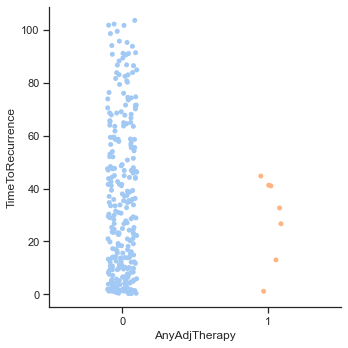

In [ ]:
# agglomeration cases in 0 to Any Adjuvant Therapy. 
# This could answer something positive about adjuvant therapies, but we see the need for data cleaning.
sns.catplot(data = df, x = "AnyAdjTherapy", y = "TimeToRecurrence")

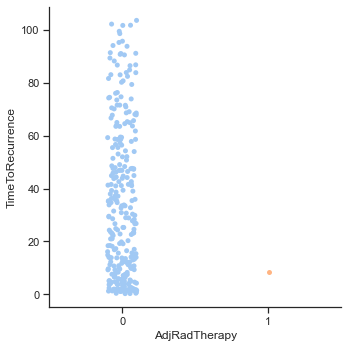

In [ ]:
# the same for radiation therapy
sns.catplot(data = df, x = "AdjRadTherapy", y = "TimeToRecurrence")

### Existe um tempo de recorrência apenas em pacientes que tiveram um escore de Gleason alto?
    O conjunto de dados tem duas colunas com Gleason Score, sGS e bGS. Eles são normalizados de maneiras diferentes.
    Enquanto sGS tem categorias entre 1 e 4, bGS tem categorias entre 1 e 3.

In [ ]:
df['sGS'].value_counts()

3    165
2     74
1     37
4     21
Name: sGS, dtype: int64

In [ ]:
df['bGS'].value_counts()

1.0    173
2.0     92
3.0     32
Name: bGS, dtype: int64

In [ ]:
# transform float in int
df["bGS"] =  df["bGS"].astype(int)

In [ ]:
# transform categorical data 
df["sGS"] = df["sGS"].replace(1, 0)
df["sGS"] = df["sGS"].replace(2, 1)
df["sGS"] = df["sGS"].replace(3, 2)
df["sGS"] = df["sGS"].replace(4, 3)

df['sGS'].value_counts()

2    165
1     74
0     37
3     21
Name: sGS, dtype: int64

(array([173.,   0.,   0.,   0.,   0.,  92.,   0.,   0.,   0.,  32.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

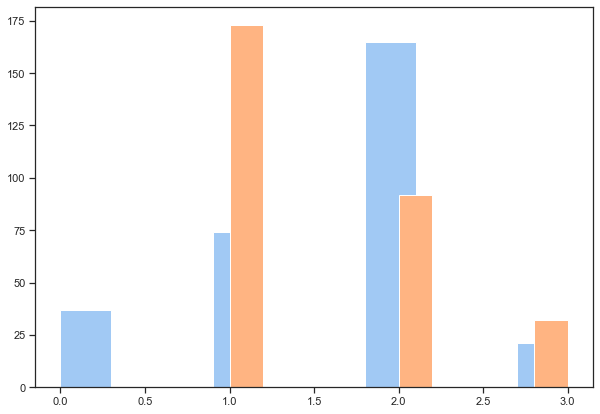

In [ ]:
# comparison between surgical and biopsy Gleason Score
# they are very different, but that doesn't mean incorrect.
plt.figure(figsize=(10,7))
plt.hist(df["sGS"])
plt.hist(df["bGS"])

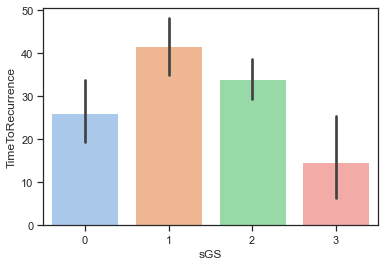

In [ ]:
# the surgery score may be more accurate than the biopsy score, so let's use it.
sns.barplot(data = df, x = "sGS", y = "TimeToRecurrence")

# The answer is no.

#### Bônus
K-means entre o tempo de recorrência e PSA pré-operatório

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans

In [ ]:
timeToRecurrenceEncoder = preprocessing.LabelEncoder()

# Instanciamos a classe LabelEncoder() acima, mas para transformar os dados precisamos que a classe:
#   1. aprenda qual vai ser o número de cada string: método fit()
#   2. transforme os dados em números: método transform
timeToRecurrenceEncoder.fit(df['TimeToRecurrence'])
timeToRecurrence = timeToRecurrenceEncoder.transform(df['TimeToRecurrence'])

In [ ]:
df["TimeToRecurrence"] = timeToRecurrence

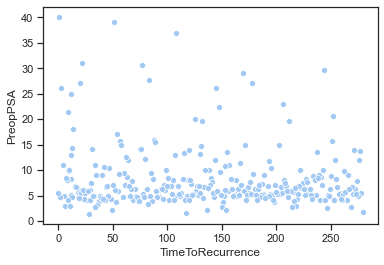

In [ ]:
# remember scatterplot
sns.scatterplot(data = df, x = "TimeToRecurrence", y = "PreopPSA")

In [ ]:
df_group = df[["TimeToRecurrence", "PreopPSA"]]

In [ ]:
kmeans = KMeans(n_clusters=4)

In [ ]:
kmeans.fit(df_group)

KMeans(n_clusters=4)

In [ ]:
kmeans.labels_

array([1, 0, 3, 2, 1, 2, 3, 1, 0, 3, 1, 0, 2, 3, 1, 2, 2, 2, 0, 2, 0, 2,
       2, 3, 0, 1, 0, 0, 0, 3, 0, 0, 2, 0, 2, 0, 0, 1, 1, 1, 0, 1, 3, 1,
       3, 0, 3, 0, 1, 2, 2, 2, 2, 2, 1, 3, 0, 1, 0, 3, 0, 2, 1, 3, 0, 3,
       2, 3, 2, 2, 2, 2, 2, 2, 3, 1, 0, 1, 1, 1, 2, 0, 2, 1, 1, 0, 3, 2,
       1, 2, 0, 0, 3, 3, 2, 2, 2, 1, 1, 3, 3, 0, 2, 2, 0, 2, 3, 2, 2, 3,
       3, 3, 1, 3, 2, 3, 3, 3, 2, 2, 3, 2, 0, 1, 3, 2, 2, 2, 2, 0, 2, 3,
       2, 2, 0, 3, 1, 2, 2, 2, 2, 0, 0, 1, 3, 0, 0, 1, 1, 0, 2, 2, 1, 2,
       1, 2, 2, 3, 3, 2, 0, 2, 0, 3, 2, 1, 0, 2, 3, 2, 0, 0, 2, 1, 3, 1,
       2, 1, 0, 2, 2, 0, 3, 3, 0, 0, 0, 0, 2, 3, 3, 3, 0, 2, 3, 0, 3, 0,
       3, 2, 0, 1, 0, 3, 0, 1, 0, 0, 0, 1, 0, 3, 1, 0, 3, 1, 0, 3, 1, 0,
       0, 1, 0, 3, 3, 0, 0, 3, 0, 1, 0, 0, 3, 0, 0, 3, 1, 0, 3, 3, 3, 3,
       3, 0, 3, 3, 0, 3, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 3, 3, 2, 2, 3, 3])

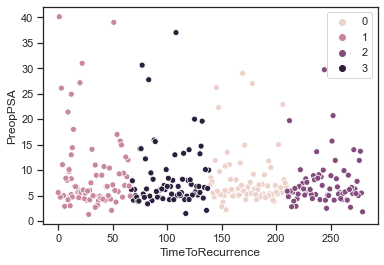

In [ ]:
sns.scatterplot(data=df_group, x="TimeToRecurrence", y="PreopPSA", hue=kmeans.labels_)

### Conclusão deste projeto.
    Neste projeto, foi possível aprender a importância de ter um conjunto de dados limpo antes de começar a extrair qualquer informação.
    Por exemplo, o conjunto de dados é muito desequilibrado, como pode ser visto em muitas visualizações. Para validar isso, várias coisas podem ser feitas, como reestruturação de dados com Undersampling, por exemplo.
    Outra grande falha encontrada neste conjunto de dados foi a quantidade de dados inconsistentes, como pode ser visto na primeira pergunta. Isso não pode ser evitado, mas podemos avaliar desconsiderando a coluna e usar TimeToRecurrence como verdadeiro.
    Trabalhos futuros incluem mais exploração e limpeza de dados, avaliando se há informações redundantes.